<a href="https://colab.research.google.com/github/IndahRan/Chatbot-PDF/blob/main/GPTpdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# to manage PDF and extract contents: pdfattach – add a new embedded file (attachment) to an existing PDF. pdfdetach – extract embedded documents from a PDF.
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (542 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [4]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq langchain==0.0.173 --progress-bar off
!pip install -qqq chromadb==0.3.23 --progress-bar off
!pip install -qqq pypdf==3.8.1 --progress-bar off
!pip install -qqq pygpt4all==1.1.0 --progress-bar off
!pip install -qqq pdf2image==1.16.3 --progress-bar off

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done


In [5]:
# untuk mengunduh file yg berasal dari gdrive
!gdown 1IIoOy9VEGDSTwr6cVM5fy3JyZ9wce5Fi

Downloading...
From: https://drive.google.com/uc?id=1IIoOy9VEGDSTwr6cVM5fy3JyZ9wce5Fi
To: /content/try1.pdf
100% 51.6k/51.6k [00:00<00:00, 76.7MB/s]


In [6]:
# untuk mendowndload GPT4all model groovy
# Wget is a convenient solution for downloading files over HTTP and FTP protocols.
!wget https://gpt4all.io/models/ggml-gpt4all-j-v1.3-groovy.bin

--2024-02-22 08:30:41--  https://gpt4all.io/models/ggml-gpt4all-j-v1.3-groovy.bin
Resolving gpt4all.io (gpt4all.io)... 104.26.1.159, 172.67.71.169, 104.26.0.159, ...
Connecting to gpt4all.io (gpt4all.io)|104.26.1.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3785248281 (3.5G)
Saving to: ‘ggml-gpt4all-j-v1.3-groovy.bin’

ggml-gpt4all-j-v1.3 100%[===================>]   3.52G  49.9MB/s    in 82s     

2024-02-22 08:32:04 (43.8 MB/s) - ‘ggml-gpt4all-j-v1.3-groovy.bin’ saved [3785248281/3785248281]



In [7]:
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import GPT4All
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from pdf2image import convert_from_path

In [8]:
# untuk menampilkan isi pdf kedalam bentuk gambar
images = convert_from_path("try1.pdf", dpi=88)
len(images)
# len ini untuk menunjukan terdapat berapa lembar/halaman yg ada pada pdf tersebut

1

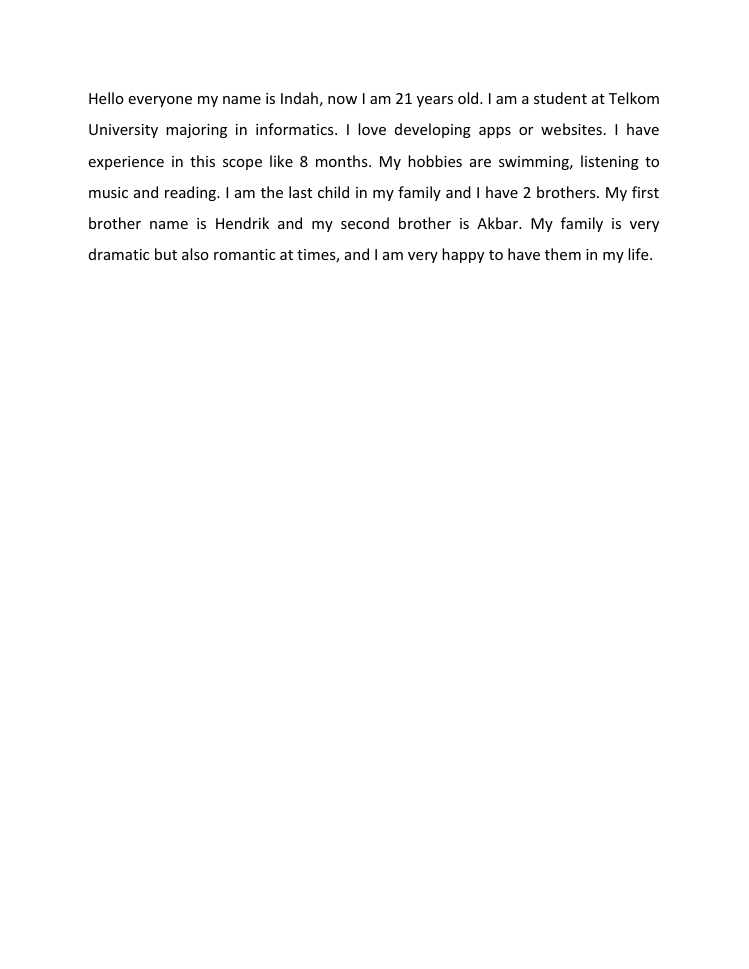

In [9]:
images[0]

## Load Data

In [10]:
loader = PyPDFLoader("try1.pdf")

In [11]:
documents = loader.load_and_split()

In [12]:
len(documents)

1

In [13]:
# untuk menampilkan isi yang ada pada pdf itu kedalam bentuk text
print(documents[0].page_content)

Hello everyone my name is Indah , now I am 21 years old. I am a student at Telkom 
University majoring in informatics. I love developing apps or websites. I have 
experience in this scope like 8 month s. My hobbies are swimming, listening to 
music and reading. I am the last child in my family and I have 2 brothers. My first 
brother name is Hendrik and my second brother is Akbar. My family is very 
dramatic but also romantic at times, and I am very happy to have them in my life.


In [14]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(documents)

## Create Embeddings

In [15]:
# huggingface is a hub of open source models for Natural Language Processing, computer vision. contoh di nlp dia bisa untuk buat summarize
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
db = Chroma.from_documents(texts, embeddings, persist_directory="db")

## Create Chain

In [17]:
model_n_ctx = 1000
model_path = "./ggml-gpt4all-j-v1.3-groovy.bin"
llm = GPT4All(model=model_path, n_ctx=1000, backend="gptj", verbose=False)

In [18]:
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 3}),
    return_source_documents=True,
    verbose=False,
)

## Ask Questions

In [ ]:
%%time
res = qa(
    "tell me about the document"
)

ERROR:langchain.vectorstores.chroma:Chroma collection langchain contains fewer than 3 elements.
ERROR:langchain.vectorstores.chroma:Chroma collection langchain contains fewer than 2 elements.


In [ ]:
print(res["result"])

In [ ]:
%%time
prompt = f"""what is indah hobby?"""
res = qa(prompt.strip())

In [ ]:
print(res["result"])

In [ ]:
%%time
prompt = f"""where is indah study?"""
res = qa(prompt.strip())

In [ ]:
print(res["result"])